<a href="https://colab.research.google.com/github/ipsa60/TimeSeriesForecasting/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/gold_monthly_csv.csv')

In [ ]:
df.index.freq='MS'

In [ ]:
df.tail()

,Sales,
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [ ]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


<Axes: >

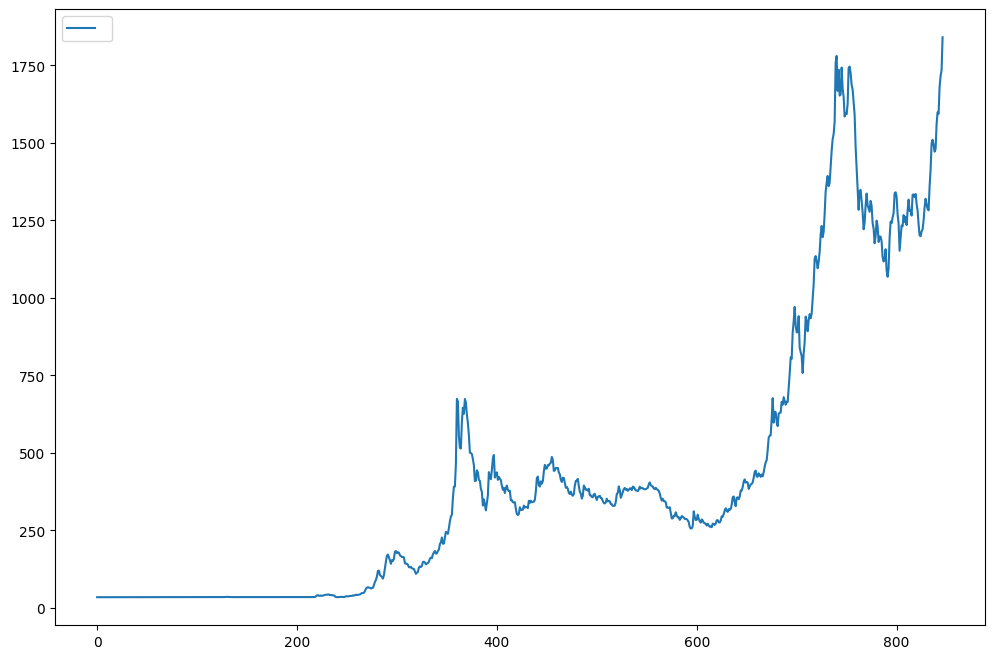

In [ ]:
df.columns=['Sales','']
df.plot(figsize=(12,8))

In [ ]:
df['Sale_LastMonth']=df['Sales'].shift(+1)
df['Sale_2Monthsback']=df['Sales'].shift(+2)
df['Sale_3Monthsback']=df['Sales'].shift(+3)
df

,Sales,,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
0,1950-01,34.730,None,None,None
1,1950-02,34.730,1950-01,None,None
2,1950-03,34.730,1950-02,1950-01,None
3,1950-04,34.730,1950-03,1950-02,1950-01
4,1950-05,34.730,1950-04,1950-03,1950-02
...,...,...,...,...,...
842,2020-03,1593.764,2020-02,2020-01,2019-12
843,2020-04,1680.030,2020-03,2020-02,2020-01
844,2020-05,1715.697,2020-04,2020-03,2020-02
845,2020-06,1734.032,2020-05,2020-04,2020-03


In [ ]:
df=df.dropna()
df

,Sales,,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback
3,1950-04,34.730,1950-03,1950-02,1950-01
4,1950-05,34.730,1950-04,1950-03,1950-02
5,1950-06,34.730,1950-05,1950-04,1950-03
6,1950-07,34.730,1950-06,1950-05,1950-04
7,1950-08,34.730,1950-07,1950-06,1950-05
...,...,...,...,...,...
842,2020-03,1593.764,2020-02,2020-01,2019-12
843,2020-04,1680.030,2020-03,2020-02,2020-01
844,2020-05,1715.697,2020-04,2020-03,2020-02
845,2020-06,1734.032,2020-05,2020-04,2020-03


In [ ]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)

In [ ]:
x1, x2, x3, y = df['Sale_LastMonth'], df['Sale_2Monthsback'], df['Sale_3Monthsback'], df['Sales']
x1, x2, x3, y = np.array(x1), np.array(x2), np.array(x3), np.array(y)
x1, x2, x3, y = x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1), y.reshape(-1, 1)
final_x = np.concatenate((x1, x2, x3), axis=1)
print(final_x)

[['1950-03' '1950-02' '1950-01']
 ['1950-04' '1950-03' '1950-02']
 ['1950-05' '1950-04' '1950-03']
 ...
 ['2020-04' '2020-03' '2020-02']
 ['2020-05' '2020-04' '2020-03']
 ['2020-06' '2020-05' '2020-04']]


In [ ]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [ ]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None,normalize=False)
model.fit(X_train,y_train)

TypeError: ignored